In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
path = 'data/podcast_list - chartable - channel_details - vn - no duplicates - videodetails - 59862 records.csv'
df = pd.read_csv(path)
df

,id,title,description,publishedAt,channelId,channelTitle,categoryId,tags,duration,viewCount,likeCount,commentCount,topicCategories
0,t6E7Rvd6Hfc,Tình yêu là quyền lực mạnh mẽ nhất - Tiến sĩ ...,NaN,2023-07-23T04:00:28Z,UCORwVnph7TK6rmyKozkV8_g,Vietcetera,22,"['vietcetera', 'podcast', 'vietcetera podcast']",PT53S,3611,296.0,3.0,"['https://en.wikipedia.org/wiki/Religion', 'ht..."
1,DgKahpjt-jc,Điều gì xảy ra khi nhờ DJ bật bài mình thích -...,NaN,2023-07-22T13:00:19Z,UCORwVnph7TK6rmyKozkV8_g,Vietcetera,22,"['vietcetera', 'podcast', 'vietcetera podcast']",PT52S,4132,60.0,0.0,['https://en.wikipedia.org/wiki/Entertainment']
2,HYr9DNoWESc,Từ bỏ công việc lương cao để trở thành DJ - DJ...,Đừng quên đăng ký theo dõi kênh YouTube của Vi...,2023-07-22T04:00:09Z,UCORwVnph7TK6rmyKozkV8_g,Vietcetera,22,"['vietcetera', 'podcast', 'vietcetera podcast']",PT27M55S,4965,124.0,8.0,NaN
3,nWnw0ZTh_ws,"“Tao là cha, nên mày phải…” - Tiến sĩ Lê Nguyê...",NaN,2023-07-21T13:00:42Z,UCORwVnph7TK6rmyKozkV8_g,Vietcetera,22,"['vietcetera', 'podcast', 'vietcetera podcast']",PT56S,11809,581.0,9.0,"['https://en.wikipedia.org/wiki/Religion', 'ht..."
4,RjEyy76OplE,"Cuộc chiến trong gia đình, không ai là người c...",Đừng quên đăng ký theo dõi Vietcetera nhé: htt...,2023-07-21T13:00:09Z,UCORwVnph7TK6rmyKozkV8_g,Vietcetera,22,"['vietcetera', 'podcast', 'vietcetera podcast']",PT1H54M32S,83388,3268.0,186.0,['https://en.wikipedia.org/wiki/Society']
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59857,G3EigEXWKM4,Các lỗi thường gặp khiến OKRs thất bại | VNOKRs,"OKRs là Simple, nhưng là simple khi so sánh vớ...",2020-05-09T16:47:35Z,UC6x44v7elqhEICapwN7laJw,VNOKRs,27,"['okrs', 'vnokrs', 'okrs sai', 'lỗi okrs']",PT1H26M32S,10651,32.0,11.0,['https://en.wikipedia.org/wiki/Business']
59858,G0eFwlAHSPw,"Theo dõi OKRs, hướng dẫn chấm điểm, checkin, đ...","""Tầm nhìn mà không thực thi thì chỉ là hão huy...",2020-04-30T15:39:33Z,UC6x44v7elqhEICapwN7laJw,VNOKRs,27,"['okrs', 'vnokrs', 'okrstool', 'check-in', 'ch...",PT1H7M47S,26940,81.0,11.0,['https://en.wikipedia.org/wiki/Business']
59859,gaQxjtkWFD8,Cách viết OKRs đúng và tốt ngay từ đầu (Phần 1...,OKRs là công cụ quản trị mục tiêu đơn giản.\nS...,2020-04-24T08:24:24Z,UC6x44v7elqhEICapwN7laJw,VNOKRs,27,"['okrs', 'vnokrs', 'viết okrs']",PT1H27M16S,221742,322.0,46.0,"['https://en.wikipedia.org/wiki/Business', 'ht..."
59860,PKh5bnfCQC4,Các bước bắt đầu triển khai đưa OKRs vào công ty,OKRs là một hệ thống quản trị mục tiêu.\nBề ng...,2020-04-14T19:08:53Z,UC6x44v7elqhEICapwN7laJw,VNOKRs,22,"['okrs', 'vnokrs', 'triển khai okrs', 'làm okrs']",PT2H14M59S,23770,98.0,16.0,['https://en.wikipedia.org/wiki/Business']


In [12]:
path = 'data/youtube_video/hanoi_hcm_all_videos_categorized.csv'
df = pd.read_csv(path)
df

,id,title,description,publishedAt,channelId,channelTitle,categoryId,tags,duration,viewCount,likeCount,commentCount,topicCategories,category
0,N8iSFc4ygT4,Thuỳ Minh: “Hãy gọi chị là bà phù thuỷ” | BAR ...,[Full] Thuỳ Minh: “Hãy gọi chị là bà phù thuỷ”...,2019-02-22T11:24:27Z,UCMqWdkIyvwsl4L4yHVODD1w,Dustin On The Go,24,"['bar stories', 'dustin on the go', 'thùy minh...",60.416667,414203,8568.0,664.0,"['entertainment', 'television_program']",Giải trí
1,kS-b8kUf3Ho,[RADIO SỐ 02] - Những Ngày Mệt Mõi,Sẽ có lúc bạn cảm thấy mệt mỏi...\nSẽ có lúc b...,2019-02-18T15:26:48Z,UCtA7RbQxdyq6YyUEphSaNLw,Yan Radio,22,NaN,4.200000,118654,1974.0,269.0,NaN,Mọi người và Blog
2,iYyAsdOqjZo,"""Tùy Duyên"" - Rất nhiều người hiểu sai | HIỂU ...","""Tùy Duyên"" - Rất nhiều người hiểu sai | HIỂU ...",2019-11-09T12:00:13Z,UC4teNNTOky4HAEh4S0q4Ahg,Trần Việt Quân,27,"['tùy duyên', 'tạo duyên', 'trần việt quân', '...",3.616667,21656,548.0,36.0,"['knowledge', 'religion']",Giáo dục
3,DgykrulaTJg,CÚNG SAO GIẢI HẠN có phải là MÊ TÍN? | Như thế...,CÚNG SAO GIẢI HẠN có phải là MÊ TÍN? | Như thế...,2019-11-04T12:00:04Z,UC4teNNTOky4HAEh4S0q4Ahg,Trần Việt Quân,27,"['trần việt quân', 'đánh thức ý nghĩa cuộc đời...",6.766667,19261,368.0,28.0,"['knowledge', 'religion']",Giáo dục
4,wBR8HDNAxsk,Podcast #2: Kmon Nguyen - Minimalism & Street ...,"Tiếp tục series Photography Podcast, mời các b...",2019-10-06T11:21:38Z,UC5bF4BWRwFHImvhiaB8VMOw,Mai Khoi Photography,22,"['minimal', 'minimalism', 'minimalist', 'photo...",43.116667,418,17.0,2.0,"['hobby', 'lifestyle_(sociology)']",Mọi người và Blog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,SOimiVQWaHI,The working state of Spotify on Windows XP/Vis...,"So, Spotify support for Windows XP/Vista will ...",2022-12-31T16:19:25Z,UC5CRE5M7D5_fAtmmuQ6i06g,AXTRplayer,22,"['spotify', 'spotify windows xp', 'spotify win...",21.333333,517,8.0,8.0,"['lifestyle_(sociology)', 'technology']",Mọi người và Blog
2887,krDu8Av8tc0,The Man with the Twisted Lip | The Adventures ...,The Man with the Twisted Lip | The Adventures ...,2022-03-14T19:00:11Z,UCx44O1_hay_aP0CXz_PIitA,Meaningful Life,26,"['librivox', 'audiobooks', 'books', 'audiobook...",51.633333,19,0.0,0.0,['entertainment'],Hướng dẫn và Phong cách
2888,0Z3OKyBiFks,[Great Ghost Stories] The Open Door By Margare...,[Great Ghost Stories] The Open Door By Margare...,2022-02-11T19:00:00Z,UCx44O1_hay_aP0CXz_PIitA,Meaningful Life,26,"['librivox', 'audiobooks', 'books', 'audiobook...",120.266667,53,0.0,0.0,"['entertainment', 'film']",Hướng dẫn và Phong cách
2889,D8f9XZ_1QE4,Nuce - Severance and the Lessons Learned | The...,'The Rift' EP is available everywhere 👇🏻\n\n🎶 ...,2022-08-20T04:00:10Z,UCzA78ZA-LDQivst4_mwJD6g,Nuce,10,"['nuce', 'nucemusic', 'nuce music lyric video'...",3.616667,383,32.0,19.0,"['hip_hop_music', 'music']",Âm nhạc


In [3]:
df.columns

Index(['id', 'title', 'description', 'publishedAt', 'channelId',
       'channelTitle', 'categoryId', 'tags', 'duration', 'viewCount',
       'likeCount', 'commentCount', 'topicCategories', 'category'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2891 non-null   object 
 1   title            2891 non-null   object 
 2   description      2780 non-null   object 
 3   publishedAt      2891 non-null   object 
 4   channelId        2891 non-null   object 
 5   channelTitle     2891 non-null   object 
 6   categoryId       2891 non-null   int64  
 7   tags             2309 non-null   object 
 8   duration         2891 non-null   float64
 9   viewCount        2891 non-null   int64  
 10  likeCount        2870 non-null   float64
 11  commentCount     2857 non-null   float64
 12  topicCategories  2182 non-null   object 
 13  category         2883 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 316.3+ KB


In [5]:
df.describe()

,categoryId,duration,viewCount,likeCount,commentCount
count,2891.000000,2891.000000,2.891000e+03,2870.000000,2857.000000
mean,22.850571,15.108642,5.469578e+04,433.993380,30.255863
std,4.288693,27.753174,2.173745e+06,4424.269416,305.860515
min,1.000000,0.033333,0.000000e+00,0.000000,0.000000
25%,22.000000,2.600000,5.600000e+01,1.000000,0.000000
50%,22.000000,6.966667,2.500000e+02,7.000000,1.000000
75%,26.000000,15.341667,1.837000e+03,43.000000,10.000000
max,29.000000,600.000000,1.167849e+08,193488.000000,14756.000000


In [6]:
df.category.value_counts()

category
Mọi người và Blog          1085
Giáo dục                    602
Du lịch và Sự kiện          277
Tin tức và Chính trị        272
Giải trí                    244
Âm nhạc                     107
Hướng dẫn và Phong cách     105
Khoa học và Công nghệ        94
Trò chơi                     31
Thể thao                     19
Phim và Hoạt ảnh             16
Ô tô và Xe cộ                14
Hài kịch                     14
Vật cưng và Động vật          3
Name: count, dtype: int64

In [7]:
df.publishedAt = pd.to_datetime(df.publishedAt)
df.categoryId = df.categoryId.astype('object')
# df[['likeCount', 'commentCount', 'viewCount']] = df[['likeCount', 'commentCount', 'viewCount']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               2891 non-null   object             
 1   title            2891 non-null   object             
 2   description      2780 non-null   object             
 3   publishedAt      2891 non-null   datetime64[ns, UTC]
 4   channelId        2891 non-null   object             
 5   channelTitle     2891 non-null   object             
 6   categoryId       2891 non-null   object             
 7   tags             2309 non-null   object             
 8   duration         2891 non-null   float64            
 9   viewCount        2891 non-null   int64              
 10  likeCount        2870 non-null   float64            
 11  commentCount     2857 non-null   float64            
 12  topicCategories  2182 non-null   object             
 13  category         2

In [8]:
# drop category Am nhac
df = df[df.category != 'Âm nhạc']

In [9]:
# create the above dataframe with rank as the columns
min_year = df.publishedAt.dt.year.min()
max_year = df.publishedAt.dt.year.max()+1

rank_df = pd.DataFrame(columns=[year for year in range(min_year, max_year)], index=df.category.unique())

for year in range(min_year, max_year):
    rank = df[df.publishedAt.dt.year == year].groupby('category').viewCount.sum().rank().sort_values(ascending=False)
    rank_df[year] = rank

rank_df = rank_df.fillna(0).astype('int64')
#drop nan row
rank_df = rank_df[rank_df.index.isna() == False]
rank_df

,2017,2018,2019,2020,2021,2022
Giải trí,0,7,11,11,11,9
Mọi người và Blog,3,6,10,12,12,12
Giáo dục,0,5,12,13,13,11
Du lịch và Sự kiện,2,3,9,8,9,10
Tin tức và Chính trị,0,0,4,5,4,8
Khoa học và Công nghệ,0,4,7,9,8,5
Hướng dẫn và Phong cách,0,0,5,10,10,6
Ô tô và Xe cộ,0,0,8,6,7,3
Thể thao,0,0,6,3,6,4
Hài kịch,0,0,3,2,5,2


In [10]:
rank_df.fillna(rank_df.min().min(), inplace=True)

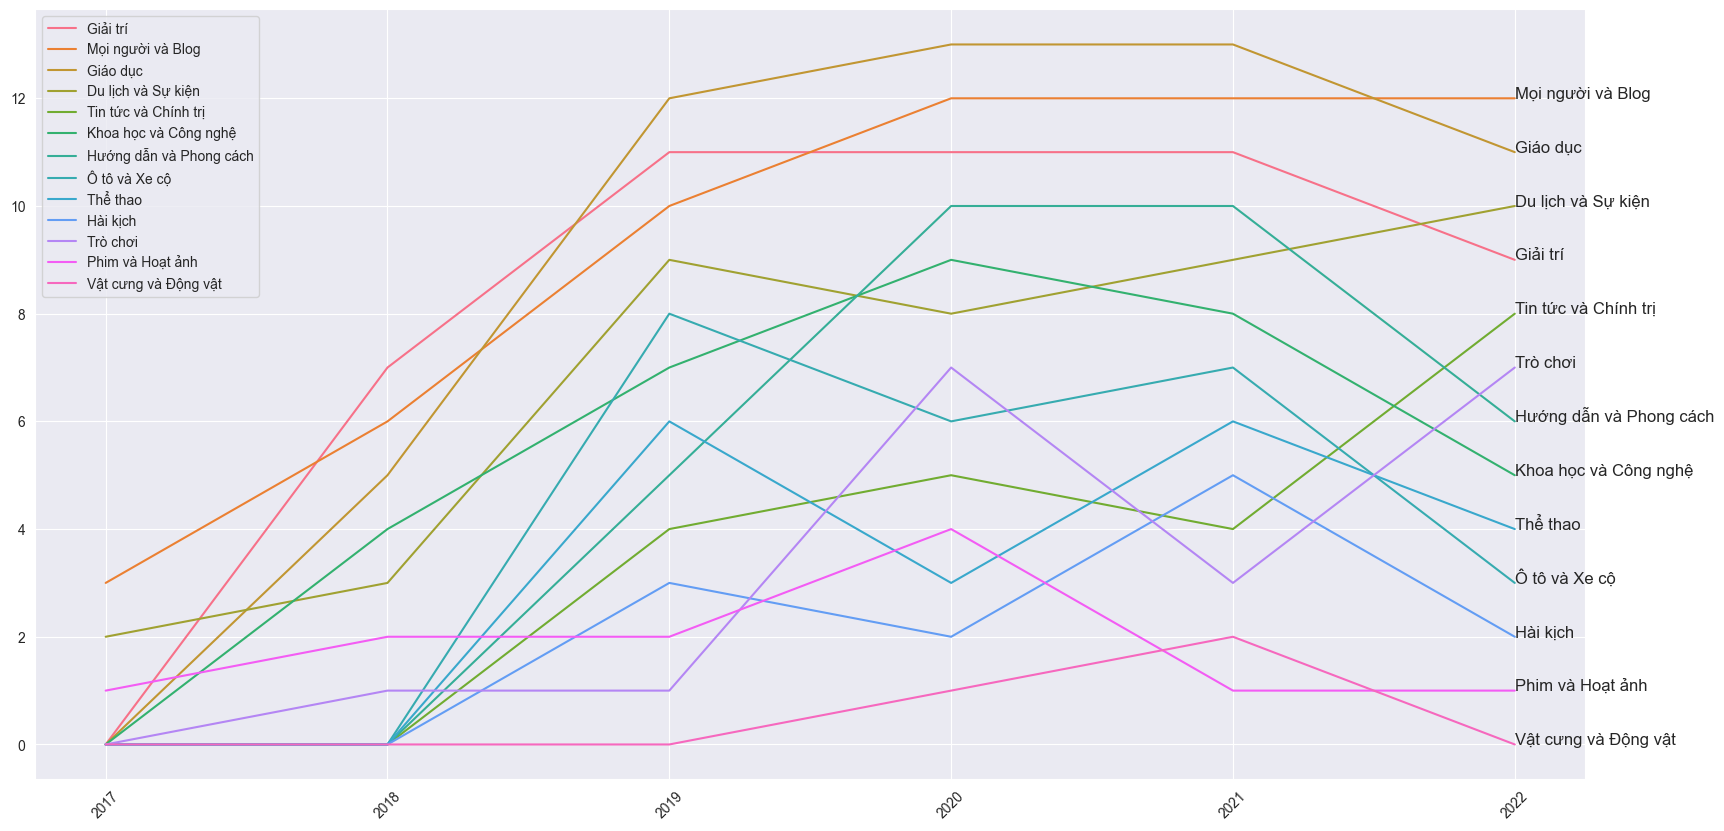

In [11]:
# plot the above dataframe as line chart
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(20, 10))
sns.lineplot(data=rank_df. T, dashes=False)
plt.xticks(rotation=45)
# label the lines
for i in range(rank_df.shape[0]):
    plt.text(x=rank_df.T.index[-1], y=rank_df.T.iloc[-1, i], s=rank_df.T.columns[i], ha='left', size=12)

plt.show()

